<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "green">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, reklama5.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>What data you will be extracting and why?</li>
<li>Add a screenshot of the web-site that you will be scraping</li>



 Ја одбрав https://coslovemetics.mk/ која претставува онлајн продавница и нуди голем избор на квалитетна козметика за нега на лице по достапни цени. Податоците кои ќе бидат извлекувани се од тековната акција на продавницата.

![screenshot](https://drive.google.com/uc?export=view&id=1hPn0vb2okkOzZPxe0LO4mH_iX65jHCwq)

# <font color='Orange'>Requirements specified for Web Scraping</font>


Import all libraries and modules that you are going to use.

In [97]:
import numpy as np
import pandas as pd

import requests

from bs4 import BeautifulSoup

from IPython.display import HTML

In [98]:
import warnings

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

In [99]:
url = 'https://coslovemetics.mk/product-category/summersale/'

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> 

 **Fetch a website's content - send request**

In [100]:
response = requests.get(url)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [101]:
response

<Response [200]>

In [102]:
response.status_code

200

In [103]:
type(response)

requests.models.Response

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [104]:
raw_html = response.text
type(raw_html)

str

In [105]:
html = BeautifulSoup(raw_html, "html.parser")

In [106]:
type(html)

bs4.BeautifulSoup

**Print the HTML code that you get**

In [107]:
html

<!DOCTYPE html>

<html lang="mk-MK">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@300;400;700&amp;display=swap" rel="stylesheet"/>
<script>document.documentElement.className = document.documentElement.className + ' yes-js js_active js'</script>
<title>SALE! SALE! – Coslovemetics.mk</title>
<meta content="max-image-preview:large" name="robots">
<!--[if lt IE 9]><script>var rfbwp_ie_8 = true;</script><![endif]--><link href="//www.google.com" rel="dns-prefetch">
<link href="//cdnjs.cloudflare.com" rel="dns-prefetch">
<link href="//s.w.org" rel="dns-prefetch"/>
<link href="https://coslovemetics.mk/feed/" rel="alternate" title="Coslovemetics.mk » Фид" type="application/rss+xml"/>
<link href="https://coslovemetics.mk/comments/feed/" rel="alternate" title="Coslovemetics.mk » фидови за коментари" type

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

<font color='red'> You need to extract a minimum of four features (lists/columns) from the web site (example: titles, posting time, comments, likes, ...)</font>

`процент на попуст, наслов, редовна цена, намалена цена`

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

**Процент на попуст**

In [108]:
html.select_one('.onsale')

<span class="onsale">28% попуст </span>

**Наслов**

In [109]:
html.select_one('.woocommerce-loop-product__title')

<h2 class="woocommerce-loop-product__title">Bebe Confort Well Beeing Oragnic oil for baby set</h2>

**Редовна цена**

In [110]:
html.select_one('del')

<del><span class="woocommerce-Price-amount amount">2.090<span class="woocommerce-Price-currencySymbol">ден</span></span></del>

**Намалена цена**

In [111]:
html.select_one('ins')

<ins><span class="woocommerce-Price-amount amount">1.512<span class="woocommerce-Price-currencySymbol">ден</span></span></ins>

**Add as many codeboxes as you need for selecting all the html elements**

*Проценти на попусти*

In [112]:
percent_off = html.find_all("span", {"class": "onsale"})
len(percent_off)

12

*Наслови*

In [113]:
product_titles = html.find_all("h2", {"class": "woocommerce-loop-product__title"})
len(product_titles)

12

*Цени*

In [114]:
prices = html.find_all("span", {"class": "woocommerce-Price-amount amount"})
len(prices)

24

**Create lists with the extracted data from the html elements that you selected**

*Проценти на попусти*

In [115]:
percent_off_elements = []

for i in range(0, len(percent_off)):
  percent_off_elements.append(percent_off[i].text)

*Наслови*

In [116]:
product_titles_elements = []

for i in range(0, len(product_titles)):
  product_titles_elements.append(product_titles[i].text)

*Цени*

In [117]:
prices_elements = []

for i in range(0, len(prices)):
  prices_elements.append(prices[i].text)

*Редовни цени*

In [118]:
full_prices = []

*Намалени цени*

In [119]:
sale_prices = []

**Print all lists that are containing the elements**

*Проценти на попусти*

In [120]:
percent_off_elements

['28% попуст ',
 '30% попуст ',
 '30% попуст ',
 '29% попуст ',
 '37% попуст ',
 '50% попуст ',
 '27% попуст ',
 '30% попуст ',
 '30% попуст ',
 '15% попуст ',
 '35% попуст ',
 '35% попуст ']

*Наслови*

In [121]:
product_titles_elements

['Bebe Confort Well Beeing Oragnic oil for baby set',
 'Benton Aloe BHA Skin Toner 200ml',
 'BENTON Aloe Hyaluron Cream 50gr',
 'BENTON Deep Green Tea Serum 30ml',
 'Benton Snail Bee Ultimate Eye Cream 30gr.',
 'BENTON Tea tree Mist 80ml',
 'COSRX Balancium Comfort Ceramide Cream Mist 120ml',
 'COSRX Hydrium Centella Aqua Soothing Ampoule 40ml',
 'COSRX Oil-Free Ultra-Moisturizing Lotion 100ml',
 'Dr.Jart Ctrl-A Teatreement Moisturizer 50ml',
 'Etude House Look At My Eyes Veil Breeze BR435',
 'Etude House Look At My Eyes Veil Breeze Café OR211']

*Цени*

In [122]:
prices_elements

['2.090ден',
 '1.512ден',
 '1.354ден',
 '948ден',
 '1.354ден',
 '948ден',
 '1.320ден',
 '937ден',
 '2.031ден',
 '1.280ден',
 '1.538ден',
 '769ден',
 '1.590ден',
 '1.161ден',
 '1.590ден',
 '1.113ден',
 '1.490ден',
 '1.043ден',
 '1.990ден',
 '1.692ден',
 '320ден',
 '208ден',
 '320ден',
 '208ден']

*Редовни цени*

In [123]:
full_prices = prices_elements[::2]
print(full_prices)

['2.090ден', '1.354ден', '1.354ден', '1.320ден', '2.031ден', '1.538ден', '1.590ден', '1.590ден', '1.490ден', '1.990ден', '320ден', '320ден']


*Намалени цени*

In [124]:
sale_prices = prices_elements[1::2]
print(sale_prices)

['1.512ден', '948ден', '948ден', '937ден', '1.280ден', '769ден', '1.161ден', '1.113ден', '1.043ден', '1.692ден', '208ден', '208ден']


**Check if all lists are the same size**

In [125]:
print(len(percent_off_elements))
print(len(product_titles_elements))
print(len(full_prices))
print(len(sale_prices))

12
12
12
12


In [126]:
len(percent_off_elements) == len(product_titles_elements) == len(full_prices) == len(sale_prices)

True

# <font color='Orange'>Create a Pandas DataFrame</font> 


**Create the DataFrame from the lists you get and name your *Columns***

In [127]:
data = []

for i in range(0, len(percent_off_elements)):
  item = {}
  item['Percent Off'] = percent_off_elements[i]
  item['Product Title'] = product_titles_elements[i]
  item['Full Price'] = full_prices[i]
  item['Sale Price'] = sale_prices[i]
  data.append(item)

df = pd.DataFrame(data)

**Print the dataset you obtain**

In [128]:
df.head(12)

,Percent Off,Product Title,Full Price,Sale Price
0,28% попуст,Bebe Confort Well Beeing Oragnic oil for baby set,2.090ден,1.512ден
1,30% попуст,Benton Aloe BHA Skin Toner 200ml,1.354ден,948ден
2,30% попуст,BENTON Aloe Hyaluron Cream 50gr,1.354ден,948ден
3,29% попуст,BENTON Deep Green Tea Serum 30ml,1.320ден,937ден
4,37% попуст,Benton Snail Bee Ultimate Eye Cream 30gr.,2.031ден,1.280ден
5,50% попуст,BENTON Tea tree Mist 80ml,1.538ден,769ден
6,27% попуст,COSRX Balancium Comfort Ceramide Cream Mist 120ml,1.590ден,1.161ден
7,30% попуст,COSRX Hydrium Centella Aqua Soothing Ampoule 40ml,1.590ден,1.113ден
8,30% попуст,COSRX Oil-Free Ultra-Moisturizing Lotion 100ml,1.490ден,1.043ден
9,15% попуст,Dr.Jart Ctrl-A Teatreement Moisturizer 50ml,1.990ден,1.692ден


# <font color = 'Green'>Advanced part</font>

<font color = 'orange'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font> 
For the extra task you will need to take a look of the Selenium library. Here is a quick intro to this library and what features it has.

Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.
 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/

Starting code id given below.

<font color ="red"> During the laboratory exercise, will be defined which side and what will need to be extracted using Selenium library</font>



Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 3s (96.6 kB/s)
Reading package li
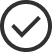

In [129]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results
#divs = wd.find_element(By.TAG_NAME, 'div')

In [130]:
from selenium.webdriver.common.by import By

In [131]:
driver = webdriver.Chrome(options=options)
driver.get("https://play.google.com/store/movies/details/Don_t_Worry_Darling?id=pckeqRD0Leo.P&hl=en&gl=US")

In [132]:
title = driver.find_element(By.CLASS_NAME, 'Fd93Bb.F5UCq.xwcR9d')

In [133]:
title.text

'Don’t Worry Darling'

In [134]:
star_rating = driver.find_element(By.CLASS_NAME, 'jILTFe') 

In [135]:
star_rating.text

'3.6'

In [136]:
# comments = driver.find_elements(By.CLASS_NAME, 'h3YV2d')

In [137]:
# all_comments = [el.text for el in wd.find_elements(By.CLASS_NAME, "h3YV2d")]

In [138]:
comment_elements = driver.find_elements('xpath', "//div[@class='h3YV2d']")
comments = [comment.text for comment in comment_elements]

In [139]:
comments

['This movie was honestly a roller coaster. My friend and his girlfriend (who we are now just ‘mutual friends’ due to an incident, went to go see this movie. She put cellophane wrap around her head during one part and I thought about doing the same as this movie stunk. And not the stink like ‘oh you just didn’t get it’ oh hell no it was poorly explained except for the corvette that was cool. 0/5 atleast the popcorn was good',
 'good movie',
 'i love harry styles']

In [150]:
comments_str = str(comments)
comments_str

"['This movie was honestly a roller coaster. My friend and his girlfriend (who we are now just ‘mutual friends’ due to an incident, went to go see this movie. She put cellophane wrap around her head during one part and I thought about doing the same as this movie stunk. And not the stink like ‘oh you just didn’t get it’ oh hell no it was poorly explained except for the corvette that was cool. 0/5 atleast the popcorn was good', 'good movie', 'i love harry styles']"

In [151]:
comments_list = comments_str.split("',")
comments_list

["['This movie was honestly a roller coaster. My friend and his girlfriend (who we are now just ‘mutual friends’ due to an incident, went to go see this movie. She put cellophane wrap around her head during one part and I thought about doing the same as this movie stunk. And not the stink like ‘oh you just didn’t get it’ oh hell no it was poorly explained except for the corvette that was cool. 0/5 atleast the popcorn was good",
 " 'good movie",
 " 'i love harry styles']"]

In [152]:
data = []

for i in range(0, len(comments)):
  item = {}
  item['Title'] = title.text
  item['Star Rating'] = star_rating.text
  item['Comments'] = comments_list[i]
  
  data.append(item)

df = pd.DataFrame(data)

In [153]:
df

,Title,Star Rating,Comments
0,Don’t Worry Darling,3.6,['This movie was honestly a roller coaster. My...
1,Don’t Worry Darling,3.6,'good movie
2,Don’t Worry Darling,3.6,'i love harry styles']
